In [355]:
#### Analysis beer competition
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chisquare

### Random data 
##### (here you should load the data of Joao)

In [356]:
### Random data

N = 30

a = np.random.randint(2, size=N*10)
b = np.random.randint(2, size=N*10)

df = pd.DataFrame({'blind':a, 'seen':b})

subjects = ['alba', 'delfi', 'anna', 'sandra', 'david', 'mariona', 'rosa', 'joao', 'genis', 'albert', 
            'pedro', 'pili', 'alba', 'gerard', 'alegria', 'montse', 'josep', 'joaquin', 'pepe', 'isi',
           'laura', 'marc', 'mire', 'sonia', 'ana', 'maria', 'eva', 'monica', 'camila', 'uri']

b1 = ['heineken', 'heineken', 'heineken', 'heineken', 'damm', 'damm',   'damm',  'galicia',  'galicia',  'cruzcampo']
b2 = ['china',    'cruzcampo', 'galicia',    'damm',   'china', 'cruzcampo', 'galicia', 'china', 'cruzcampo', 'china']

subj_st = []
#comb = []
b1s = []
b2s = []


for s in subjects:
    subj_st.append([ s for x in range(0,10)])
    #comb.append([ str(i) for i in range(1,11)])    
    b1s.append(b1)
    b2s.append(b2)

df['subj'] = list(itertools.chain.from_iterable(subj_st))
#df['comb'] = list(itertools.chain.from_iterable(comb))
df['beer1'] = list(itertools.chain.from_iterable(b1s))
df['beer2'] = list(itertools.chain.from_iterable(b2s))

df.head(20)

,blind,seen,subj,beer1,beer2
0,0,1,alba,heineken,china
1,1,1,alba,heineken,cruzcampo
2,1,0,alba,heineken,galicia
3,0,1,alba,heineken,damm
4,0,0,alba,damm,china
5,1,1,alba,damm,cruzcampo
6,1,0,alba,damm,galicia
7,0,1,alba,galicia,china
8,0,0,alba,galicia,cruzcampo
9,0,1,alba,cruzcampo,china


# Stats

## 1 Question: Are we consistent blind - seen?
#### (subjet and group level)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


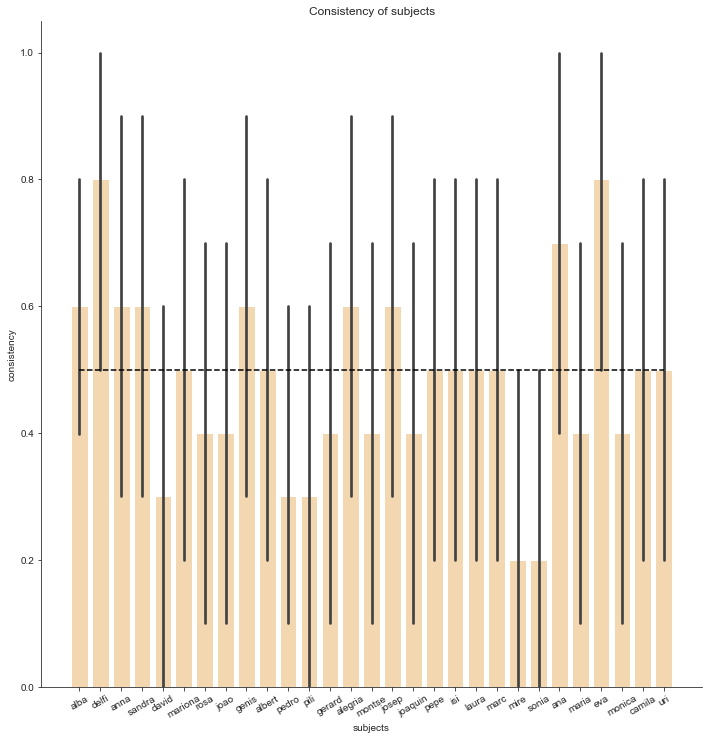

alba, consistency p_val = 0.503
delfi, consistency p_val = 0.109
anna, consistency p_val = 0.754
sandra, consistency p_val = 0.754
david, consistency p_val = 0.344
mariona, consistency p_val = 1.0
rosa, consistency p_val = 0.754
joao, consistency p_val = 0.754
genis, consistency p_val = 0.754
albert, consistency p_val = 1.0
pedro, consistency p_val = 0.344
pili, consistency p_val = 0.344
gerard, consistency p_val = 0.754
alegria, consistency p_val = 0.754
montse, consistency p_val = 0.754
josep, consistency p_val = 0.754
joaquin, consistency p_val = 0.754
pepe, consistency p_val = 1.0
isi, consistency p_val = 1.0
laura, consistency p_val = 1.0
marc, consistency p_val = 1.0
mire, consistency p_val = 0.109
sonia, consistency p_val = 0.109
ana, consistency p_val = 0.344
maria, consistency p_val = 0.754
eva, consistency p_val = 0.109
monica, consistency p_val = 0.754
camila, consistency p_val = 1.0
uri, consistency p_val = 1.0


In [357]:
##
# column of consistency (1: you are not consisten blind-seen, 0: consistent)
## 0.5 is chance level


df['int'] = 1
df['consistency'] = abs( df['blind'] - df['seen'] )

## Subjcet consistency.
g= sns.factorplot(x='subj', y='consistency', kind='bar', data=df, color='#fed9a6', size=10)
g.set_xticklabels(rotation=30)
plt.title('Consistency of subjects')
plt.xlabel('subjects')
plt.plot([0, len(df.subj.unique())-1], [0.5, 0.5], 'k--')
plt.show(block=False)


## Each subject
for subj in df.subj.unique():
    df_s = df.loc[df['subj'] == subj]
    times_consistent = df_s.loc[df.consistency == 1, 'consistency'].count()
    p_val = stats.binom_test(times_consistent, n=len(df_s), p=0.5, alternative='two-sided')
    print( subj + ', consistency p_val = ' + str(round(p_val, 3)))


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


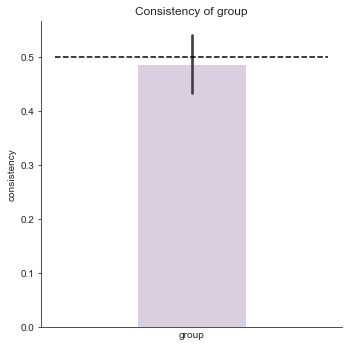

Group consistency p_val = 0.686


In [358]:
## Population consistency
## Subjcet consistency.
sns.factorplot(x='int', y='consistency', kind='bar', data=df, color= '#decbe4')
plt.plot([-1, 1], [0.5, 0.5], 'k--')
plt.tick_params(axis='x',  which='both', bottom=False,  top=False,  labelbottom=False) 
plt.xlabel('group')
plt.title('Consistency of group')
plt.show(block=False)

#As a group
times_consistent = df.loc[df.consistency == 1, 'consistency'].count()
p_val = stats.binom_test(times_consistent, n=len(df), p=0.5, alternative='two-sided')

print( 'Group consistency p_val = ' + str(round(p_val, 3)))

## 2. Are all beers the same?


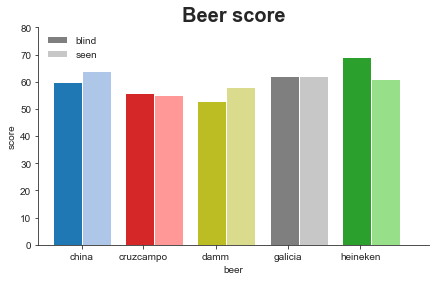

Objective Difference between beers p_val = 0.645
Subjective Difference between beers p_val = 0.934


,beer,counts_b,counts_s
4,china,60,64
1,cruzcampo,56,55
3,damm,53,58
2,galicia,62,62
0,heineken,69,61


In [359]:
############
############## rank of beers by number of winning situations
############
order_list = [ 'china', 'cruzcampo',  'damm',  'galicia', 'heineken' ]


blind_win=[]
seen_win=[]

for i in range(0, len(df)):
    ### blind
    res = df['blind'].iloc[i]
    if res == 0:
        blind_win.append(  df['beer1'].iloc[i]  )
    elif res==1:
        blind_win.append(  df['beer2'].iloc[i]  )
    
    ### seen
    res_s = df['seen'].iloc[i]
    if res_s == 0:
        seen_win.append(  df['beer1'].iloc[i]  )
    elif res_s ==1:
        seen_win.append(  df['beer2'].iloc[i]  )



df['blind_win'] = blind_win
df['seen_win'] = seen_win 


beers=[]
counts_b=[]
counts_s=[]
for beer in df['blind_win'].unique():
    beers.append(beer)
    counts_b.append( df.loc[df.blind_win == beer, 'blind_win'].count())
    counts_s.append( df.loc[df.seen_win == beer, 'seen_win'].count())


##   
df_b = pd.DataFrame({ 'beer':beers, 'counts': counts_b}) 
df_b['condition'] = 'blind'
#
df_s = pd.DataFrame({ 'beer':beers, 'counts': counts_s}) 
df_s['condition'] = 'seen'

df_bs = pd.DataFrame({ 'beer':beers, 'counts_b': counts_b, 'counts_s': counts_s}) 

# df_b_s = pd.concat([df_b, df_s])
# sns.factorplot(x='beer', y='counts', hue='condition', kind='bar', hue_order = ['blind', 'seen'], order=order_list, data=df_b_s)
# plt.title('Beer score')
# plt.show(block=False)

#####

width=0.4

df_b['indx_plot']=df_b['beer'].copy()
df_b['indx_plot'] = df_b['indx_plot'].replace(order_list, [0, 1, 2, 3, 4])

df_s['indx_plot']=df_s['beer'].copy()
df_s['indx_plot'] = df_s['indx_plot'].replace(order_list, [0 + width, 1 + width, 2+ width, 3+ width, 4+ width])


Colors = ['#1f77b4', '#aec7e8', '#d62728', '#ff9896', '#bcbd22', '#dbdb8d', '#7f7f7f', '#c7c7c7', '#2ca02c', '#98df8a']

df_merge=pd.concat([df_b, df_s])
df_merge = df_merge.sort_values('beer')

fig, ax = plt.subplots()
fig.set_size_inches(7, 4)
plt.bar(df_merge['indx_plot'],df_merge['counts'], color=Colors , width=width)
plt.xticks( [width/2, 1.25-width/2, 2.25-width/2, 3.25-width/2, 4.25-width/2], order_list)
ax.set_title('Beer score', fontsize=20, weight='demibold')
#plt.title('Beer score')
plt.xlabel('beer')
plt.ylabel('score')
plt.xlim(-width, 5)
plt.ylim(0, 80)
plt.bar(10,1, color='#7f7f7f', label='blind')
plt.bar(10,1, color= '#c7c7c7', label='seen')
plt.legend(frameon=False)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()



## Calculate all together with a Chi Square
## If they are all the same, they should win 20% of the times each.

f_obs = list(df_bs.counts_b)
f_exp = [0.2*len(df) for i in range(0,5)]

p_val = chisquare(f_obs, f_exp)[1]
print( 'Objective Difference between beers p_val = ' + str(round(p_val, 3)))

f_obs = list(df_bs.counts_s)
f_exp = [0.2*len(df) for i in range(0,5)]

p_val = chisquare(f_obs, f_exp)[1]
print( 'Subjective Difference between beers p_val = ' + str(round(p_val, 3)))

df_bs.sort_values('beer')


### 2. 1 Is a beer objectively better or worse than chance?

In [360]:
### Binomial test!

##Option 1
## Is Heineken better than the others?
## I have 5 beers. If all are equally good, they should win 20% of the times each. By chance --> p=0.20
## 30 people --> 300 tests 
#print(stats.binom_test(58, n=300, p=0.20, alternative='two-sided'))

##Option 2
## Is Heineken better than the others?
## I have 5 beers. Heineken participated in 4*N = 4*30 subj = 120 tests 1vs 1.
## If heinezen is better, p>0.5 --> p=0.5
#print(stats.binom_test(58, n=120, p=0.5, alternative='two-sided'))

####

for beer in df_bs.beer.unique():
    p_val = stats.binom_test( df_bs.loc[df_bs['beer']==beer, 'counts_b']  , n=len(df), p=0.20, alternative='two-sided')
    print( beer + ', blind p_val = ' + str(round(p_val, 3)))




heineken, blind p_val = 0.194
cruzcampo, blind p_val = 0.614
galicia, blind p_val = 0.773
damm, blind p_val = 0.348
china, blind p_val = 1.0


### 2.2 Is a beer subjectively better or worse than chance?

In [361]:
####

for beer in df_bs.beer.unique():
    p_val = stats.binom_test( df_bs.loc[df_bs['beer']==beer, 'counts_s']  , n=len(df), p=0.20, alternative='two-sided')
    print( beer + ', seen p_val = ' + str(round(p_val, 3)))



heineken, seen p_val = 0.885
cruzcampo, seen p_val = 0.516
galicia, seen p_val = 0.773
damm, seen p_val = 0.829
china, seen p_val = 0.564


## 3. Is a beer socially over or under rated?
### #Social overrating and underrating 
##### (+ is social overrating and - social underrating, 0 means social rating reflects reality)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


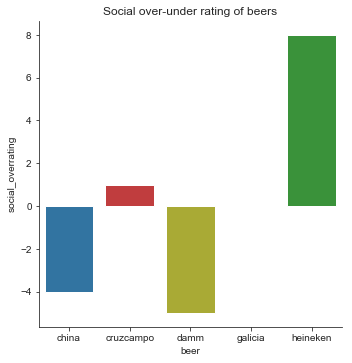

,beer,counts_b,counts_s,social_overrating
4,china,60,64,-4
1,cruzcampo,56,55,1
3,damm,53,58,-5
2,galicia,62,62,0
0,heineken,69,61,8


In [362]:
#####
df_bs['social_overrating'] = df_bs['counts_b'] - df_bs['counts_s']

Colors = ['#1f77b4',  '#d62728',  '#bcbd22',  '#7f7f7f',  '#2ca02c']
sns.factorplot(x='beer', y='social_overrating', order=order_list, kind='bar', data=df_bs, palette=Colors)
plt.title('Social over-under rating of beers') ## if +, the beer is socaily overrated. If -, it is socially underrated
plt.show(block=False)

df_bs.sort_values('beer')

In [363]:
### It is the way to compare with itself
#### Blind / N is the expected p
#### Seen is the expected 

for beer in df_bs.beer.unique():
    p_blind = df_bs.loc[df_bs['beer']==beer, 'counts_b']/len(df)
    p_blind = p_blind.values[0]
    f_seen = df_bs.loc[df_bs['beer']==beer, 'counts_s'].values[0]   
    p_val = stats.binom_test( f_seen , n=len(df), p= p_blind, alternative='two-sided')
    print( beer + ', seen p_val = ' + str(round(p_val, 3)))

heineken, seen p_val = 0.303
cruzcampo, seen p_val = 0.941
galicia, seen p_val = 1.0
damm, seen p_val = 0.449
china, seen p_val = 0.564


### Are we socially biased by brands?

In [364]:
## Calculate all together with a Chi Square
f_obs = list(df_bs.counts_s)
f_exp = list(df_bs.counts_b)

p_val = chisquare(f_obs, f_exp)[1]

print( 'Group brand bias p_val = ' + str(round(p_val, 3)))

Group brand bias p_val = 0.794
